In [1]:
#Gerekli Kütüphanelerin içeri aktarılması
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

### Problem Statment

#### Predict Loan Eligibility for Finance Company
#####  Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

##### Data Dictionary
1. Gender = Male/ Female
2. Education = 	Applicant Education (Graduate/ Under Graduate)
3. Marrital status = Applicant married (Y/N)
4. Loand Amount = Loan amount in thousands
5. Credit History = credit history meets guidelines
6. Account Balance = Account balance in account
7. Property Area = rban/ Semi Urban/ Rural
8. Credit History = credit history meets guidelines
9. Dependants = Number of dependents
10. Self Employment Status = Self employed (Y/N)



In [2]:
df = pd.read_csv("train.csv")

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop('Loan_ID',axis=1 , inplace=True)

In [4]:
df.shape

(614, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


<AxesSubplot:>

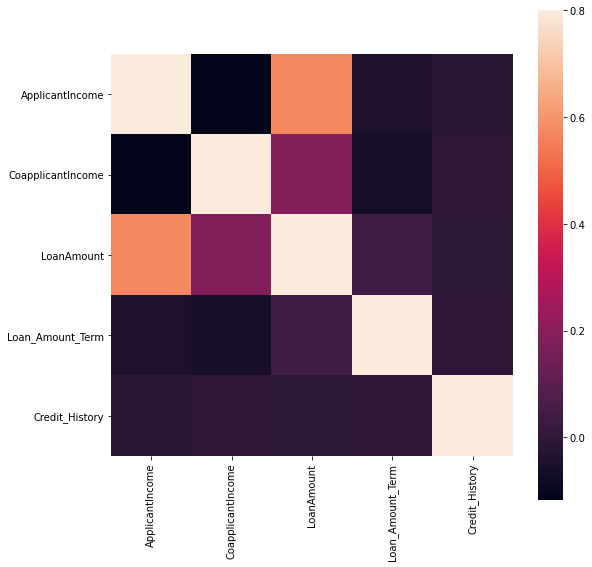

In [6]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

Y    422
N    192
Name: Loan_Status, dtype: int64

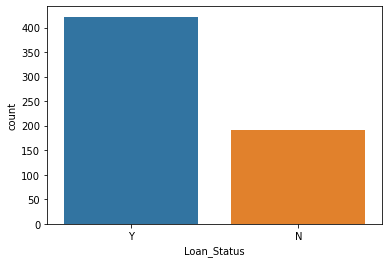

In [7]:
sns.countplot('Loan_Status',data=df);
df.Loan_Status.value_counts()

In [8]:
Cat = df.select_dtypes(include='object').drop('Loan_Status', axis=1).columns.tolist()
Num = df.select_dtypes(exclude='object').columns.tolist()

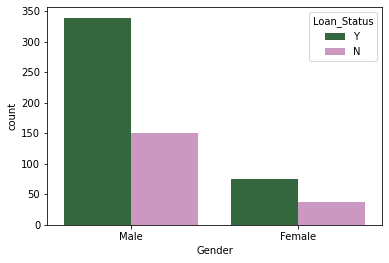

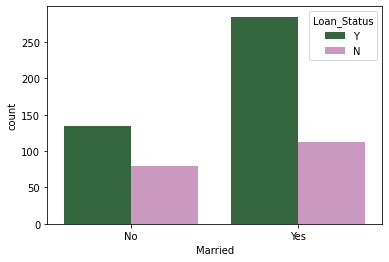

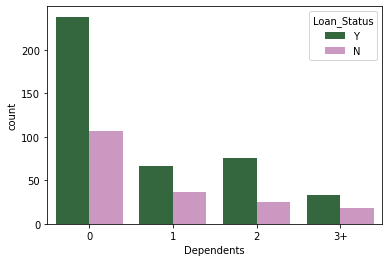

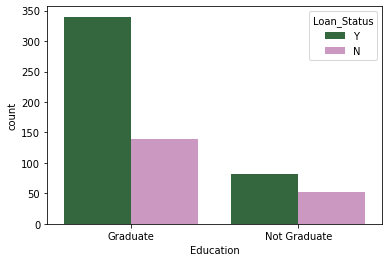

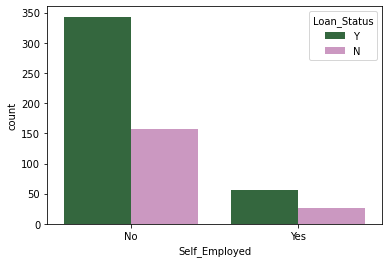

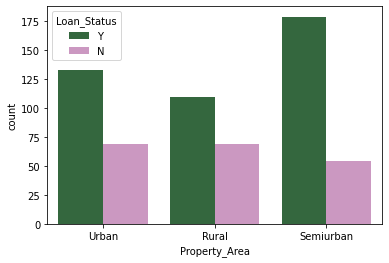

In [9]:
for i in Cat:
    sns.countplot(df[i],data=df,hue='Loan_Status',palette='cubehelix')
    plt.show()

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

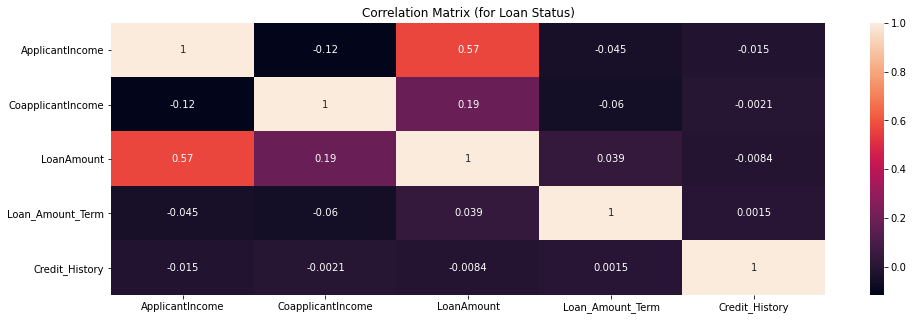

In [10]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

In [11]:
df.Gender.fillna(df.Gender.mode()[0],inplace=True)
df.Married.fillna(df.Married.mode()[0],inplace=True)
df.Dependents.fillna(df.Dependents.mode()[0],inplace=True)
df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace=True)
df.Credit_History.fillna(df.Credit_History.mode()[0],inplace=True)

In [12]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [13]:
df.Loan_Amount_Term.fillna(df .Loan_Amount_Term.mode()[0],inplace=True)
df.LoanAmount.fillna(df .LoanAmount.median(),inplace=True)

In [14]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder


var_mod= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

le = LabelEncoder()

for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [16]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [17]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [18]:
X = df.drop('Loan_Status',axis=1)
y= df['Loan_Status']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(411, 11) (203, 11) (411,) (203,)


In [23]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_prediction = lr.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7980295566502463


In [24]:
model = svm.SVC()
model.fit(X_train,y_train)

svc_prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  0.645320197044335


In [25]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

dt_prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree accuracy =  0.6699507389162561


In [26]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

knn_prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.5665024630541872


>The Loan Status is heavily dependent on the Credit History for Predictions.
The Logistic Regression algorithm gives us the maximum Accuracy (79% approx) compared to the other 3 Machine Learning Classification Algorithms.

In [30]:
import pickle 
file = './Model/ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(lr, f)

In [31]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [32]:
cy = k.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
print(cy)

[1]
